# RMixtComp Canadian Weather example
Unsupervised clustering with functional data

In [1]:
library(RMixtComp)

Loading required package: RMixtCompUtilities



## Discover the data

Load the Canadian Weather dataset included in the package.

In [2]:
data(CanadianWeather)

This dataset contains daily temperature and precipitation at 35 different locations in Canada averaged over 1960 to 1994. Once imported you have access to a `CanadianWeather` object containing 5 elements:
- `temapav`, an average of temperatures for each day of the year;

In [3]:
head(CanadianWeather$tempav)

St. Johns,Halifax,Sydney,Yarmouth,Charlottvl,Fredericton,Scheffervll,Arvida,Bagottville,Quebec,⋯,Vancouver,Victoria,Pr. George,Pr. Rupert,Whitehorse,Dawson,Yellowknife,Iqaluit,Inuvik,Resolute
-3.6,-4.4,-3.8,-1.4,-5.8,-7.9,-22.5,-14.1,-14.6,-10.8,⋯,2.3,3.0,-10.5,0.4,-17.6,-28.0,-24.5,-23.3,-26.3,-30.7
-3.1,-4.2,-3.5,-1.6,-5.6,-7.5,-23.0,-14.4,-14.7,-11.4,⋯,2.1,2.7,-11.4,0.5,-18.6,-28.9,-25.3,-24.0,-27.1,-30.6
-3.4,-5.3,-4.6,-2.5,-7.3,-9.3,-23.0,-15.0,-15.5,-12.5,⋯,1.9,2.7,-11.0,-0.2,-18.6,-29.5,-26.1,-24.4,-27.8,-31.4
-4.4,-5.4,-5.0,-2.3,-7.0,-8.7,-21.8,-14.3,-14.3,-11.2,⋯,2.0,2.9,-11.9,-0.6,-20.0,-29.0,-27.7,-24.7,-28.2,-31.9
-2.9,-5.6,-4.1,-2.4,-6.7,-9.1,-23.5,-16.2,-15.8,-12.0,⋯,1.6,2.6,-13.5,-1.0,-20.9,-28.8,-27.8,-25.3,-27.2,-31.5
-4.5,-7.1,-6.1,-3.7,-8.9,-10.9,-24.4,-16.3,-16.9,-13.2,⋯,1.4,2.1,-13.2,-0.6,-21.0,-29.9,-28.1,-26.3,-27.6,-31.1


- `precav`, an average of precipitation for each day of the year;

In [4]:
head(CanadianWeather$precav)

St. Johns,Halifax,Sydney,Yarmouth,Charlottvl,Fredericton,Scheffervll,Arvida,Bagottville,Quebec,⋯,Vancouver,Victoria,Pr. George,Pr. Rupert,Whitehorse,Dawson,Yellowknife,Iqaluit,Inuvik,Resolute
5.2,6.0,5.3,5.6,4.6,4.0,1.1,2.6,3.0,4.1,⋯,5.5,5.3,2.2,6.0,0.5,0.9,0.6,1.1,0.8,0.1
5.8,5.3,5.2,3.7,4.4,3.2,1.3,1.2,1.8,2.3,⋯,6.6,5.2,1.9,5.0,0.8,0.6,0.7,0.9,0.9,0.1
3.9,2.6,2.1,2.8,2.3,3.3,1.2,2.1,1.3,2.6,⋯,6.8,5.4,1.9,6.7,1.1,0.8,0.3,0.8,0.8,0.0
4.3,5.3,5.0,5.3,4.8,3.3,1.3,2.3,2.5,4.3,⋯,5.1,4.5,1.8,7.1,0.2,0.8,0.5,0.7,0.4,0.2
6.2,6.0,7.3,3.8,5.1,2.7,1.0,1.7,2.1,2.3,⋯,3.8,4.6,1.1,6.1,0.6,1.0,0.7,0.9,0.8,0.2
3.4,2.1,2.2,2.4,1.5,0.8,1.3,2.0,1.6,1.5,⋯,2.5,2.6,1.2,8.1,0.7,1.0,0.5,0.2,0.4,0.2


- `coordinates`, the coordinates of each location;

In [5]:
head(CanadianWeather$coordinates)

,N.latitude,W.longitude
St. Johns,47.34,52.43
Halifax,44.39,63.36
Sydney,46.09,60.11
Yarmouth,43.50,66.07
Charlottvl,42.48,80.25
Fredericton,45.58,66.39


- `region`, the climate zone of each location;

In [6]:
head(CanadianWeather$region)

St. Johns     Halifax      Sydney    Yarmouth  Charlottvl Fredericton 
 "Atlantic"  "Atlantic"  "Atlantic"  "Atlantic"  "Atlantic"  "Atlantic"

- and `time`, a time index for days over a year,  from 1 to 365.

In [7]:
head(CanadianWeather$time)

[1] 1 2 3 4 5 6

## Visualize the data

### Temperature

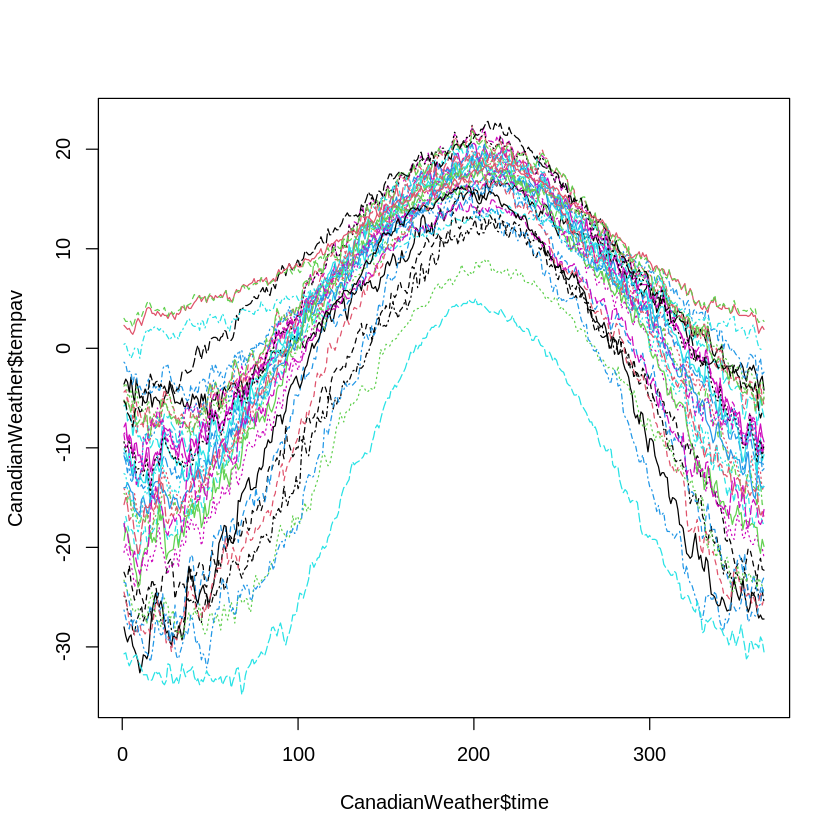

In [8]:
matplot(CanadianWeather$time, CanadianWeather$tempav, type = "l")

### Precipitation

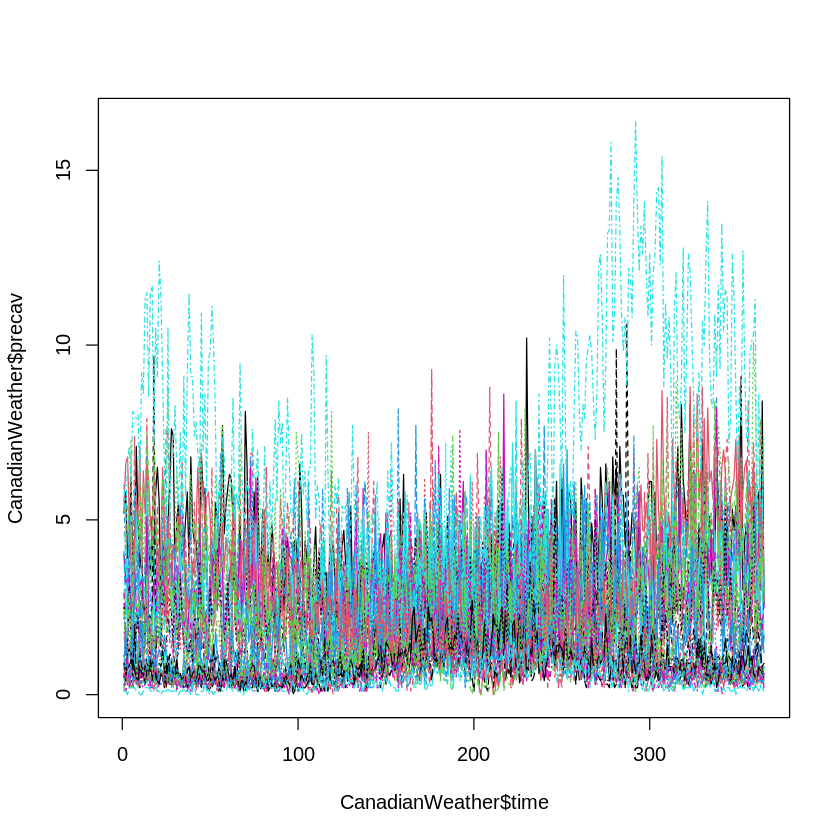

In [9]:
matplot(CanadianWeather$time, CanadianWeather$precav, type = "l")

## Transform the data

The data must be converted in the RMixtComp format, which is for one functional:

    'time_1:value_1,time_2:value_2, ..., time_n:value:n'

In [10]:
data <- list(tempav = apply(CanadianWeather$tempav, 2, function(x) createFunctional(CanadianWeather$time, x)),
             precav = apply(CanadianWeather$precav, 2, function(x) createFunctional(CanadianWeather$time, x)))

Which gives for the temperatures of the first city:

In [11]:
data$tempav[1]

St. Johns   
"1:-3.6,2:-3.1,3:-3.4,4:-4.4,5:-2.9,6:-4.5,7:-5.5,8:-3.1,9:-4,10:-5,11:-4.8,12:-5.2,13:-5.5,14:-5.4,15:-4.4,16:-4.6,17:-5.9,18:-5,19:-4.9,20:-5.2,21:-5.3,22:-5.9,23:-5.7,24:-5,25:-4.5,26:-4.5,27:-3.3,28:-4.1,29:-4.7,30:-5.5,31:-5.4,32:-5.5,33:-5.6,34:-5,35:-5.8,36:-5.9,37:-5.4,38:-6.1,39:-5.6,40:-4.6,41:-5.1,42:-4.8,43:-5.1,44:-6,45:-4.6,46:-5.3,47:-4.6,48:-6,49:-7,50:-6.5,51:-5.1,52:-5.2,53:-5.2,54:-4.4,55:-6.2,56:-5.8,57:-4.5,58:-3.9,59:-4.3,60:-4.2,61:-4,62:-3.5,63:-3.6,64:-3.5,65:-4.1,66:-4.1,67:-3,68:-3.5,69:-4.8,70:-3.9,71:-3.4,72:-4.2,73:-4,74:-3.6,75:-2.2,76:-1.5,77:-1.8,78:-2.4,79:-2.1,80:-2.4,81:-2.1,82:-2.1,83:-1.3,84:-1,85:-0.5,86:-0.3,87:-0.5,88:-0.3,89:-0.4,90:-0.2,91:-0.5,92:-0.3,93:-0.8,94:-0.4,95:0.1,96:1.1,97:0.9,98:1.2,99:0.5,100:1,101:1.1,102:0.7,103:0.2,104:0,105:0.7,106:1.1,107:1,108:1.4,109:1.6,110:1.2,111:2.3,112:2.6,113:2.3,114:2.1,115:1.7,116:2.5,117:3.5,118:3.4,119:2.7,120:2.8,121:3.7,122:4.8,123:4.7,124:4.6,125:4.5,126:5,127:3.6,128:2.8,129:4.2,130:4.6,131:5.6,132:5.4,133:5.6,134:6.3,135:6.4,136:5.8,137:6.8,138:6.3,139:6.6,140:6.6,141:6.8,142:6.1,143:6,144:6.2,145:5.7,146:6.1,147:7.1,148:7.2,149:7.4,150:8.4,151:8.7,152:8.3,153:8.8,154:9.5,155:9.2,156:8.3,157:8.6,158:8.6,159:9.8,160:9,161:8.7,162:8.8,163:9.1,164:9.8,165:10.1,166:10.6,167:12.1,168:11.9,169:11.2,170:13,171:13.4,172:13.1,173:11.6,174:11.9,175:11.6,176:12.6,177:11.3,178:12.5,179:12.9,180:13.3,181:14,182:13.3,183:12.8,184:13.5,185:13.7,186:13.8,187:13.8,188:14,189:14.7,190:14.8,191:15,192:15.6,193:15.6,194:14.9,195:15.4,196:15.6,197:15.8,198:15.7,199:15.2,200:16,201:15.9,202:15.8,203:14.9,204:15.6,205:15.1,206:15.3,207:16.8,208:16.2,209:16,210:16.8,211:17.1,212:16.7,213:16.3,214:16.9,215:16.3,216:16.5,217:16.5,218:16.5,219:16.6,220:16.4,221:16,222:16,223:16.4,224:16.2,225:15.9,226:15.8,227:15.8,228:15.9,229:15.2,230:15.4,231:14.9,232:14.3,233:14.7,234:14.5,235:14,236:13.1,237:13.3,238:13.8,239:13.5,240:14.5,241:14.4,242:14.2,243:13.9,244:13,245:12.7,246:12.2,247:11.8,248:11.3,249:12.7,250:13.2,251:12.5,252:12.7,253:13,254:12.5,255:12.5,256:11.6,257:11.6,258:11.5,259:11.5,260:11.3,261:11.4,262:11.6,263:11,264:11.2,265:11.1,266:11.3,267:11.4,268:10.8,269:11.4,270:10.9,271:10.4,272:9.6,273:9,274:8.6,275:9,276:10,277:9.6,278:8.7,279:8.6,280:9.3,281:9.2,282:8.1,283:7.9,284:7.2,285:7.2,286:7.8,287:7,288:7.1,289:7.6,290:6.3,291:6.3,292:6.9,293:6.1,294:5.9,295:5.7,296:5.1,297:5.8,298:6,299:6.7,300:6,301:4.9,302:4.6,303:4.8,304:3.6,305:4.1,306:5.1,307:4.5,308:5.5,309:5.9,310:4.5,311:4.4,312:3.7,313:3.7,314:3.5,315:3.2,316:3.9,317:3.6,318:3.6,319:3.4,320:2.7,321:2,322:3,323:2.6,324:1.3,325:1.2,326:1.9,327:1.3,328:1.4,329:1.9,330:1.4,331:1.3,332:0.6,333:2.2,334:1.2,335:0.2,336:-0.6,337:-0.8,338:-0.3,339:-0.1,340:-0.1,341:0.3,342:-1.2,343:-1.9,344:-1.8,345:-1.8,346:-1.8,347:-1.7,348:-2.5,349:-2.2,350:-2.2,351:-1.8,352:-1.5,353:-1.9,354:-2.8,355:-3.3,356:-2.2,357:-1.9,358:-2.2,359:-1.7,360:-2.3,361:-2.9,362:-4,363:-3.2,364:-2.8,365:-4.2"

## Clustering with RMixtComp

Define the distribution used for each variable and the associated hyperparameters. The functional model requires 2 hyperparameters: `nSub` is the number of subregressions into which the function will be decomposed; `nCoeff` is the number of polynomial coefficients of each subregression (2 = line). 

In [12]:
nSub <- 4
nCoeff <- 2
func <- list(type = "Func_CS", paramStr = paste0("nSub: ", nSub, ", nCoeff: ", nCoeff))
model <- list(tempav = func, precav = func)

Define the SEM algorithm's parameters

In [13]:
algo <- createAlgo()

Choose the desired number of classes and the number of runs for each given number of classes.

In [14]:
nClass <- 2:4
nRun <- 3

In [15]:
res <- mixtCompLearn(data, model, algo, nClass = nClass, criterion = "ICL", nRun = nRun, nCore = 2)

====== Run Hierarchical MixtComp in learn mode with 3 run(s) per number of classes and 2 core(s)
Data: 35 individuals and 3 variables.
-- K = 1 
Run time: 32.274s
-- K = 2
Number of splits to perform: 1
 Split a cluster in two
 Compute criterion
Run time: 32.655s
-- K = 3
Number of splits to perform: 2
 Split a cluster in two
 Split a cluster in two
 Compute criterion
Run time: 96.874s
-- K = 4
Number of splits to perform: 2
 Split a cluster in two
 Split a cluster in two
 Compute criterion
Run time: 86s
Total runtime: 247.804s
Best model according to ICL: 4 clusters.


## Output's Analysis

### Criterion

This chart represents the criterion value (choose between BIC and ICL) for each model that was built. The higher the value (close to 0) the better the model. 

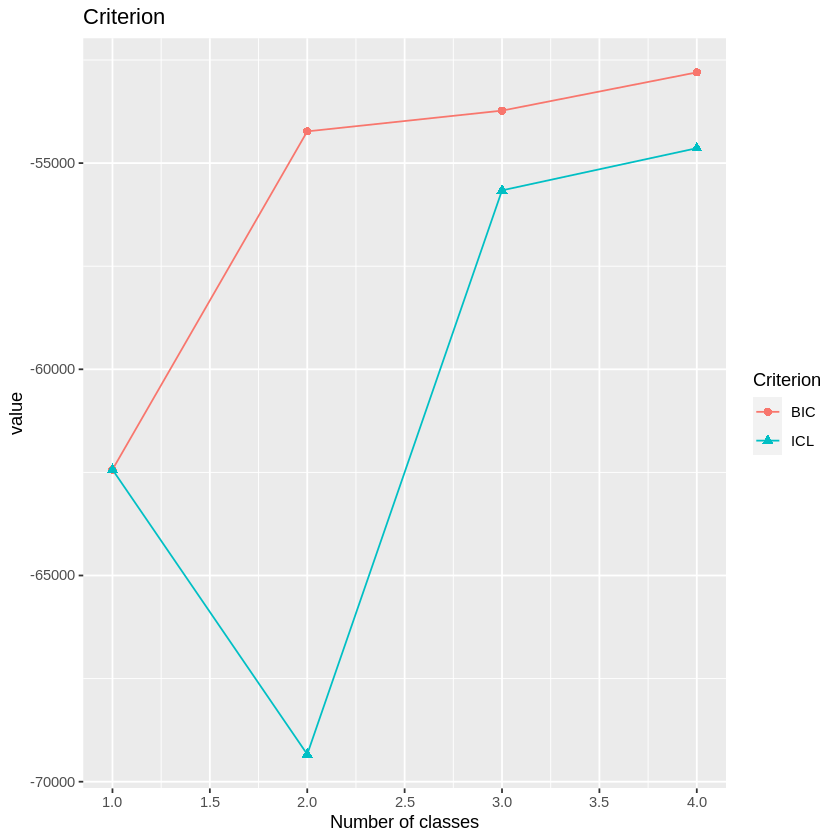

In [16]:
plotCrit(res)

Choose the number of classes to study in the following.

In [17]:
K <- 3
resK <- extractMixtCompObject(res, K)

### Variables

This chart represents the discriminating level of each variable. A high value (close to one) means that the variable is highly discriminating. A low value (close to zero) means that the variable is poorly discriminating.

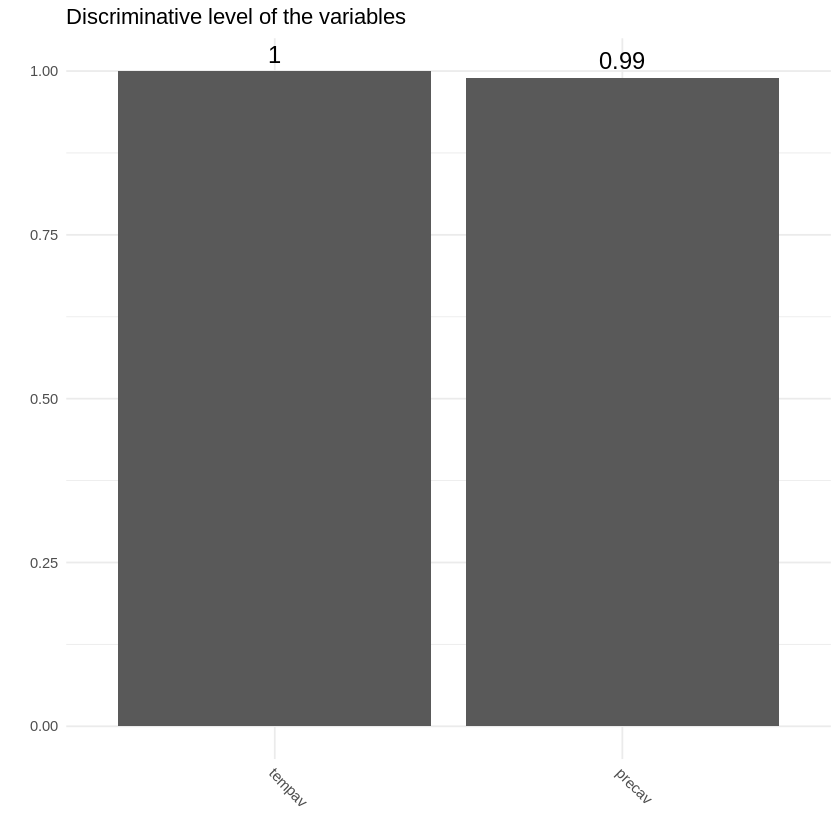

In [18]:
plotDiscrimVar(resK)

This graph displays the similarity between every pair of variable. A high value (close to one) means that the two variables provide the same information for the clustering task (i.e. similar partitions). A low value (close to zero) means that the two variables provide some different information for the clustering task (i.e. different partitions).

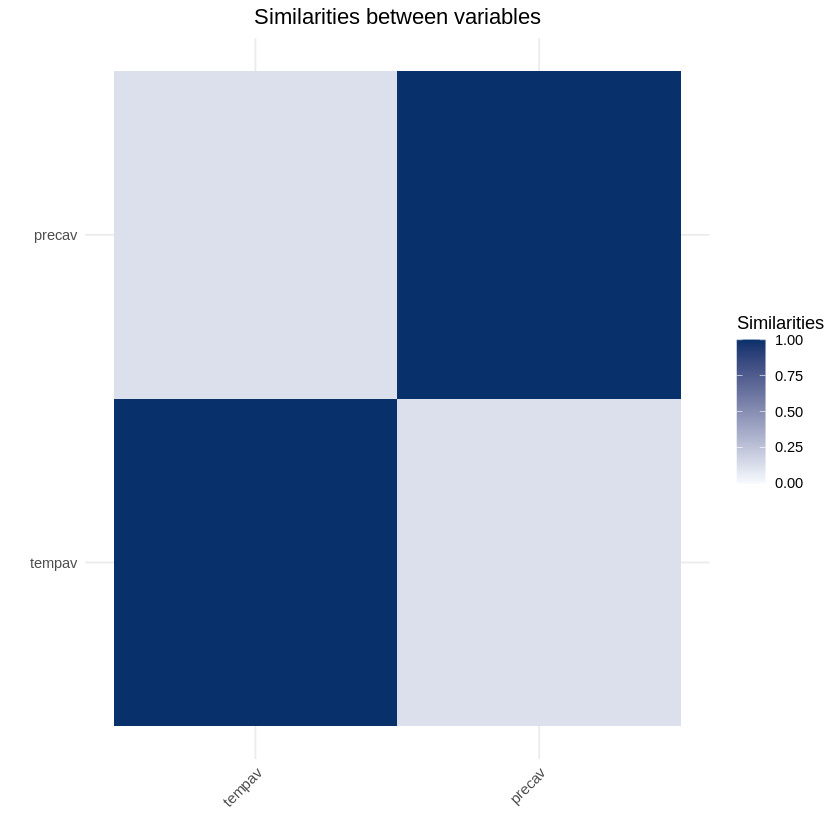

In [19]:
heatmapVar(resK)

Draw the distribution of the two variables.

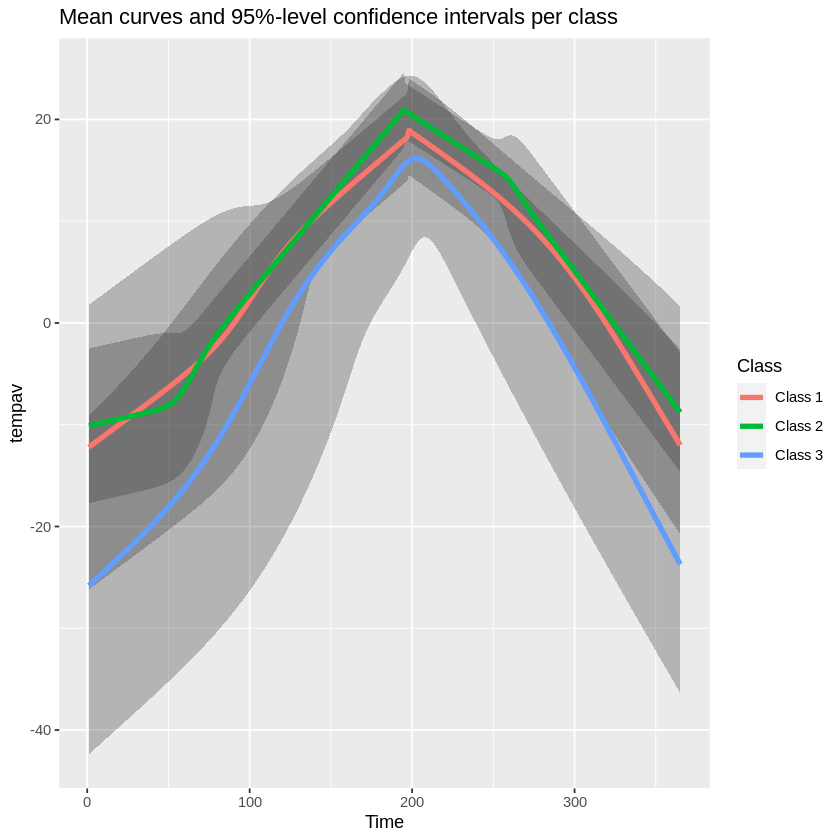

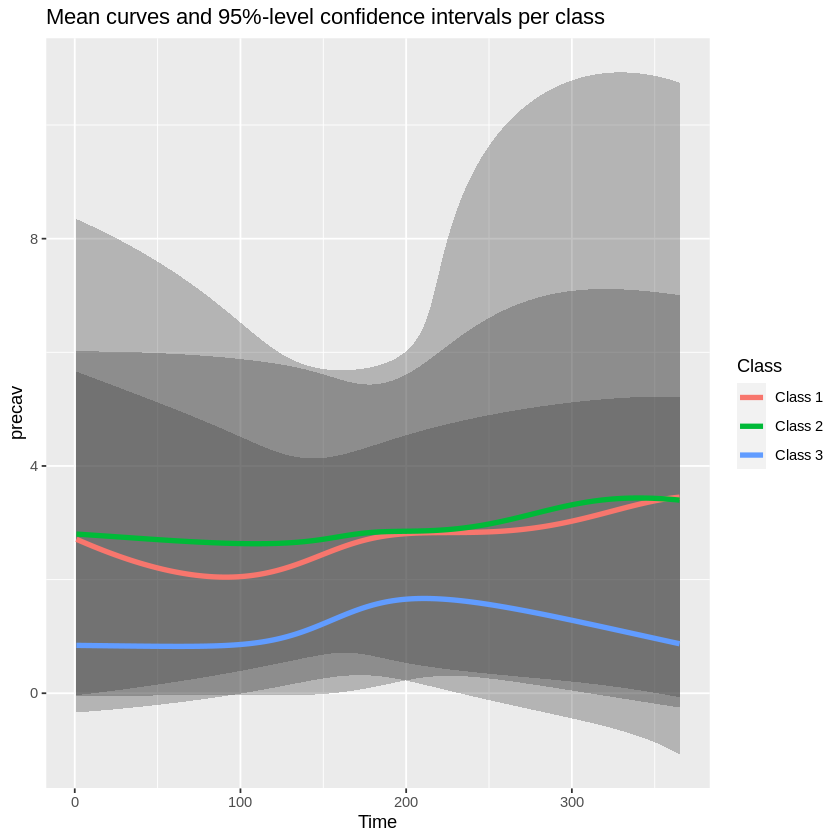

In [20]:
plotDataCI(resK, "tempav")
plotDataCI(resK, "precav")

### Classes

This chart shows the proportion of individuals in each class.

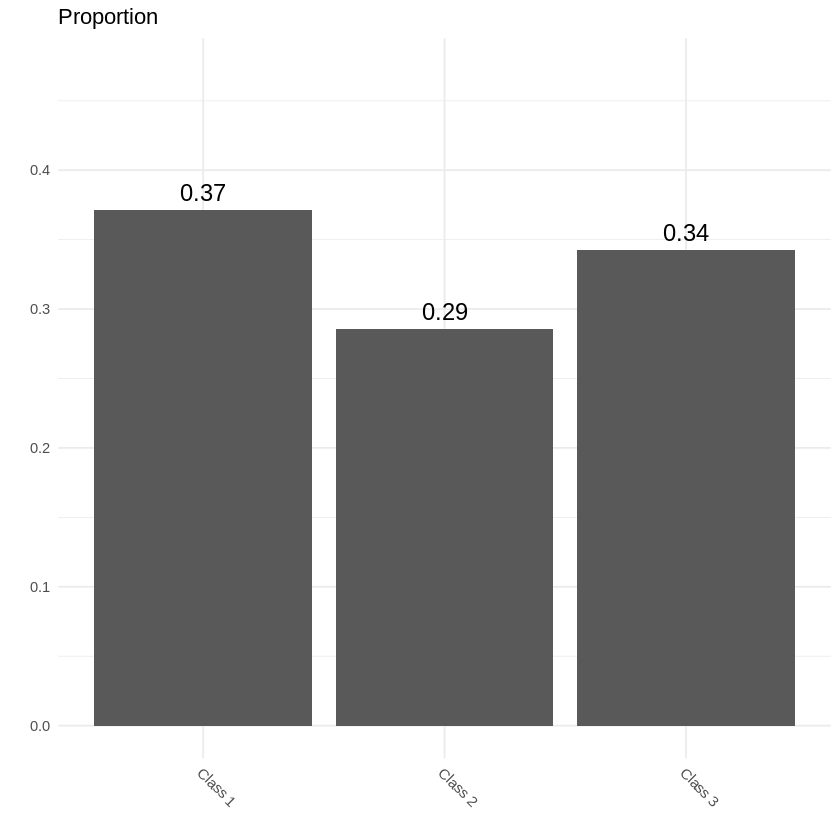

In [21]:
plotProportion(resK)

This chart represents the similarity level between each pair of classes. A high value (close to one) means that the 2 classes are strongly different (i.e. low overlapping). A low value (close to zero) means that the 2 classes are similar for the clustering task (i.e. high overlapping).

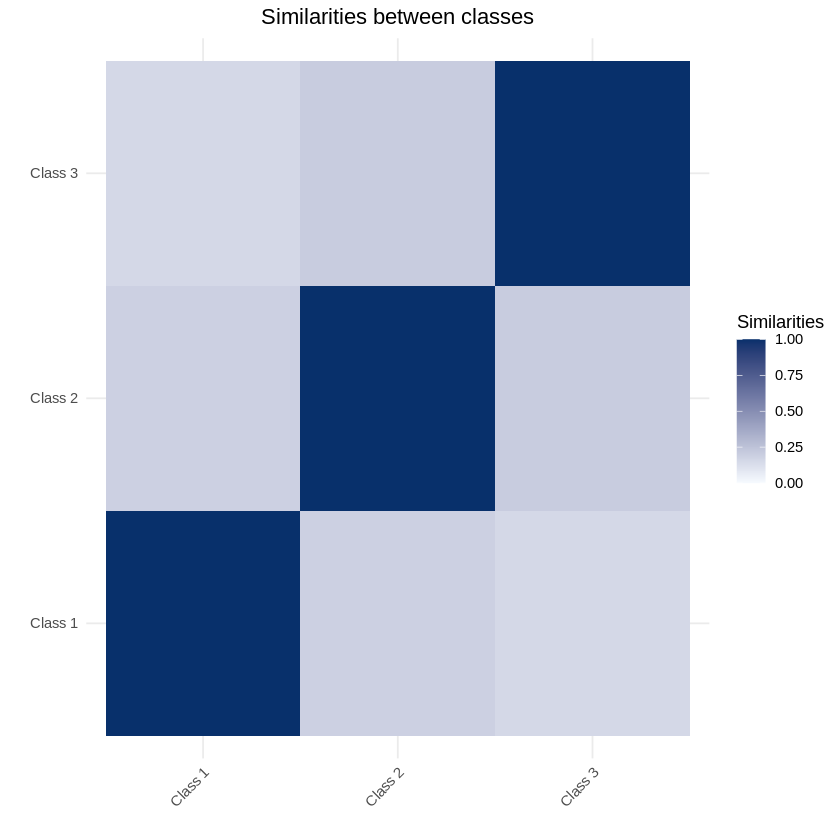

In [22]:
heatmapClass(resK)

The graph displays the discriminating level of each variable for the selected class.

In [23]:
class <- 2
variable <- "tempav"

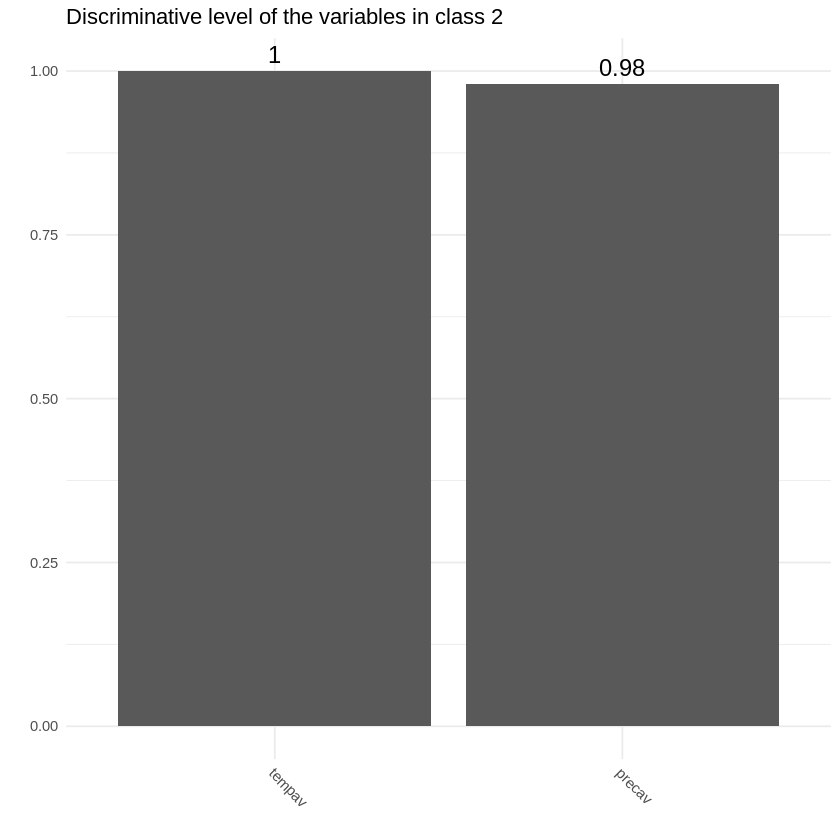

In [24]:
plotDiscrimVar(resK, class = class)

This chart summarizes the distribution of the selected variable for the selected class.

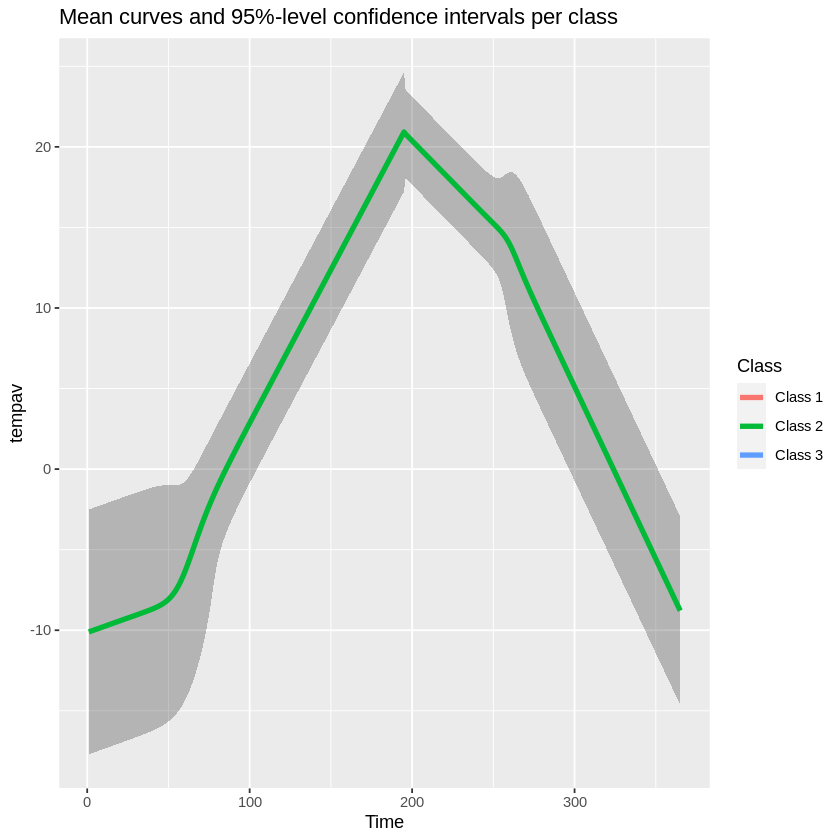

In [25]:
plotDataCI(resK, variable, class = class, grl = TRUE)

### Probabilities

This chart shows the probability of assignment to a class for each individual. Individuals have been reordered in decreasing assignment probability. 

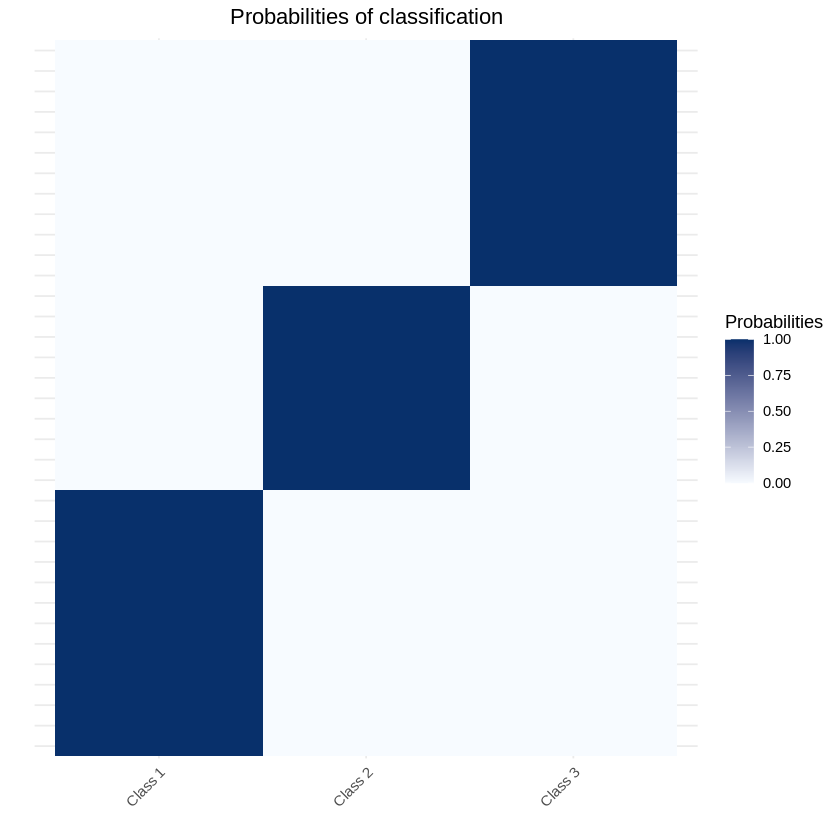

In [26]:
heatmapTikSorted(resK)

### Advanced

Visualize in a *Gaussian-like way*, and onto R2, results of Gaussian or non-Gaussian based clustering.

In [27]:
library(ClusVis)

In [28]:
logTik <- getTik(resK, log = TRUE)
prop <- getProportion(resK)
resVisu <- clusvis(logTik, prop)

#### Component Interpretation

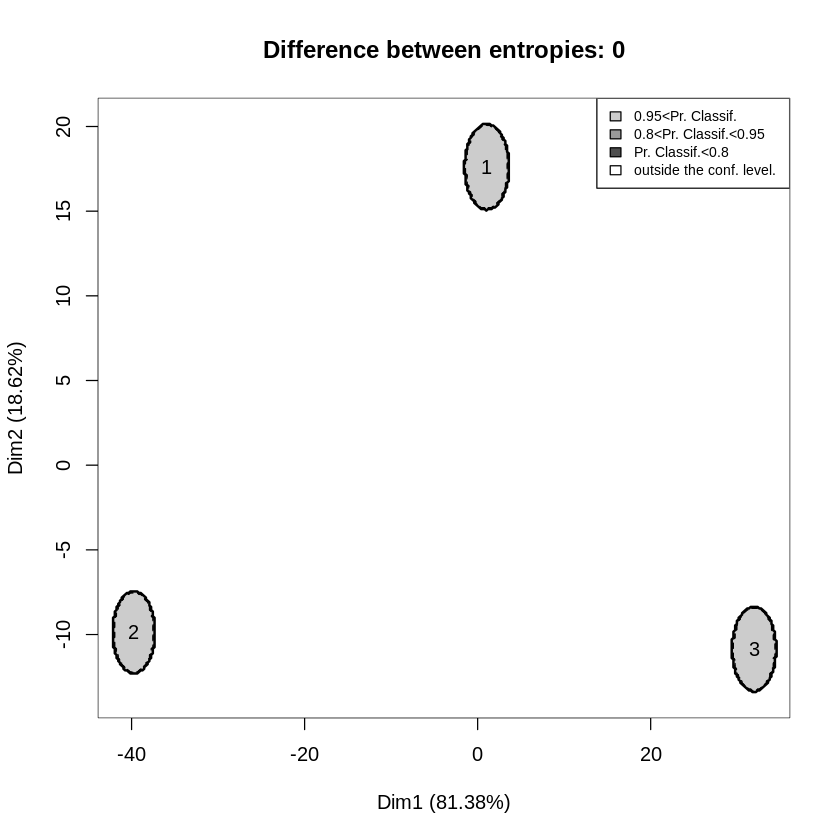

In [29]:
plotDensityClusVisu(resVisu, add.obs = FALSE)

#### Observation Scatter-plot 

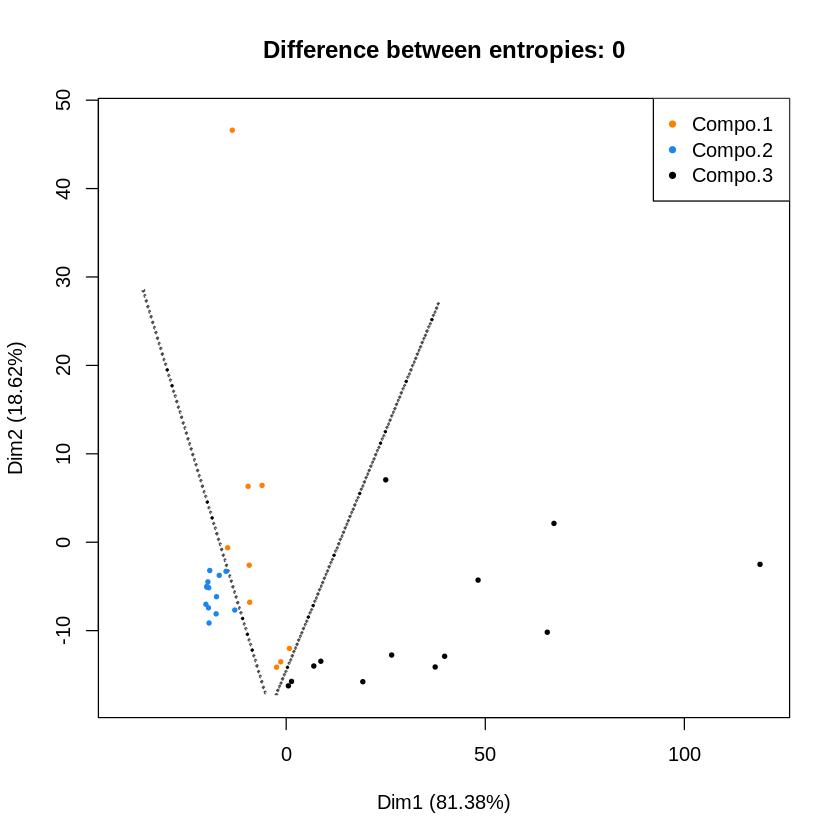

In [30]:
plotDensityClusVisu(resVisu, add.obs = TRUE)